# <center><strong>Bike Sharing Dataset</strong></center>


# **Task-1**

###<strong>Data Frame<strong>

#<p>A DataFrame is a data structure that organizes data into a 2-dimensional table of rows and columns, much like a spreadsheet.<p>



**Load Dataset**


In [134]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import io
import numpy as np

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [135]:
from google.colab import files 
uplaoded=files.upload()

Saving dayinfo.csv to dayinfo.csv


In [136]:
d_f=pd.read_csv(io.BytesIO(uplaoded['dayinfo.csv']))
d_f.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


**Dataset Exploration**

In [137]:
dir(d_f)

['T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__re

In [138]:
d_f.count

<bound method DataFrame.count of      instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
0          1  2011-01-01       1   0  ...   0.160446     331         654   985
1          2  2011-01-02       1   0  ...   0.248539     131         670   801
2          3  2011-01-03       1   0  ...   0.248309     120        1229  1349
3          4  2011-01-04       1   0  ...   0.160296     108        1454  1562
4          5  2011-01-05       1   0  ...   0.186900      82        1518  1600
..       ...         ...     ...  ..  ...        ...     ...         ...   ...
726      727  2012-12-27       1   1  ...   0.350133     247        1867  2114
727      728  2012-12-28       1   1  ...   0.155471     644        2451  3095
728      729  2012-12-29       1   1  ...   0.124383     159        1182  1341
729      730  2012-12-30       1   1  ...   0.350754     364        1432  1796
730      731  2012-12-31       1   1  ...   0.154846     439        2290  2729

[731 rows x 16 col

In [139]:
print (d_f)

     instant      dteday  season  yr  ...  windspeed  casual  registered   cnt
0          1  2011-01-01       1   0  ...   0.160446     331         654   985
1          2  2011-01-02       1   0  ...   0.248539     131         670   801
2          3  2011-01-03       1   0  ...   0.248309     120        1229  1349
3          4  2011-01-04       1   0  ...   0.160296     108        1454  1562
4          5  2011-01-05       1   0  ...   0.186900      82        1518  1600
..       ...         ...     ...  ..  ...        ...     ...         ...   ...
726      727  2012-12-27       1   1  ...   0.350133     247        1867  2114
727      728  2012-12-28       1   1  ...   0.155471     644        2451  3095
728      729  2012-12-29       1   1  ...   0.124383     159        1182  1341
729      730  2012-12-30       1   1  ...   0.350754     364        1432  1796
730      731  2012-12-31       1   1  ...   0.154846     439        2290  2729

[731 rows x 16 columns]


**Dataset size and shape**

In [140]:
d_f.size

11696

In [141]:
d_f.shape

(731, 16)

**Columns and their information**

In [142]:
# rows
row = len(d_f.axes[0])
print(row)
# columns
col= len(d_f.axes[1])
print(col)
print(d_f.axes[1])

731
16
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [143]:
list(d_f.columns)

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [144]:
d_f.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [145]:
for i in d_f.axes[1]:
  print(d_f[i].value_counts())

731    1
251    1
249    1
248    1
247    1
      ..
486    1
485    1
484    1
483    1
1      1
Name: instant, Length: 731, dtype: int64
2012-03-05    1
2011-07-18    1
2011-11-05    1
2012-02-14    1
2011-07-16    1
             ..
2012-03-21    1
2011-03-14    1
2012-01-02    1
2012-08-02    1
2011-12-02    1
Name: dteday, Length: 731, dtype: int64
3    188
2    184
1    181
4    178
Name: season, dtype: int64
1    366
0    365
Name: yr, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     57
Name: mnth, dtype: int64
0    710
1     21
Name: holiday, dtype: int64
6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64
1    500
0    231
Name: workingday, dtype: int64
1    463
2    247
3     21
Name: weathersit, dtype: int64
0.265833    5
0.635000    5
0.437500    4
0.564167    4
0.649167    4
           ..
0.226957    1
0.354167    1
0.580833    1
0.231667    1
0.337500    1
Name: tem

**Null Value Check**
<p>There are no null values in the columns.

In [146]:
d_f.isna().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool


<p>We can see that there is no null values in this dataset.

**Dropping duplicate Value**

In [147]:
d_f.dropna()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [148]:
d_f.dropna().sum()

instant                                                  267546
dteday        2011-01-012011-01-022011-01-032011-01-042011-0...
season                                                     1825
yr                                                          366
mnth                                                       4766
holiday                                                      21
weekday                                                    2191
workingday                                                  500
weathersit                                                 1020
temp                                                    362.126
atemp                                                   346.753
hum                                                     458.991
windspeed                                               139.245
casual                                                   620017
registered                                              2672662
cnt                                     

In [149]:
d_f.drop_duplicates()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796



<p>We can use delete duplicate values by above functions.

**Data From A particular Column**

In [150]:
d_f['season']

0      1
1      1
2      1
3      1
4      1
      ..
726    1
727    1
728    1
729    1
730    1
Name: season, Length: 731, dtype: int64

In [151]:
d_f['dteday'].value_counts()

2012-03-05    1
2011-07-18    1
2011-11-05    1
2012-02-14    1
2011-07-16    1
             ..
2012-03-21    1
2011-03-14    1
2012-01-02    1
2012-08-02    1
2011-12-02    1
Name: dteday, Length: 731, dtype: int64

In [152]:
d_f['windspeed'].value_counts()

0.228858    3
0.118792    3
0.134954    3
0.149883    3
0.166667    3
           ..
0.388067    1
0.185333    1
0.189667    1
0.290421    1
0.415429    1
Name: windspeed, Length: 650, dtype: int64

# Task-2

###<strong>Contents of dataset</strong>
<p>Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. 

**Plotting and visualizing**

<function matplotlib.pyplot.show>

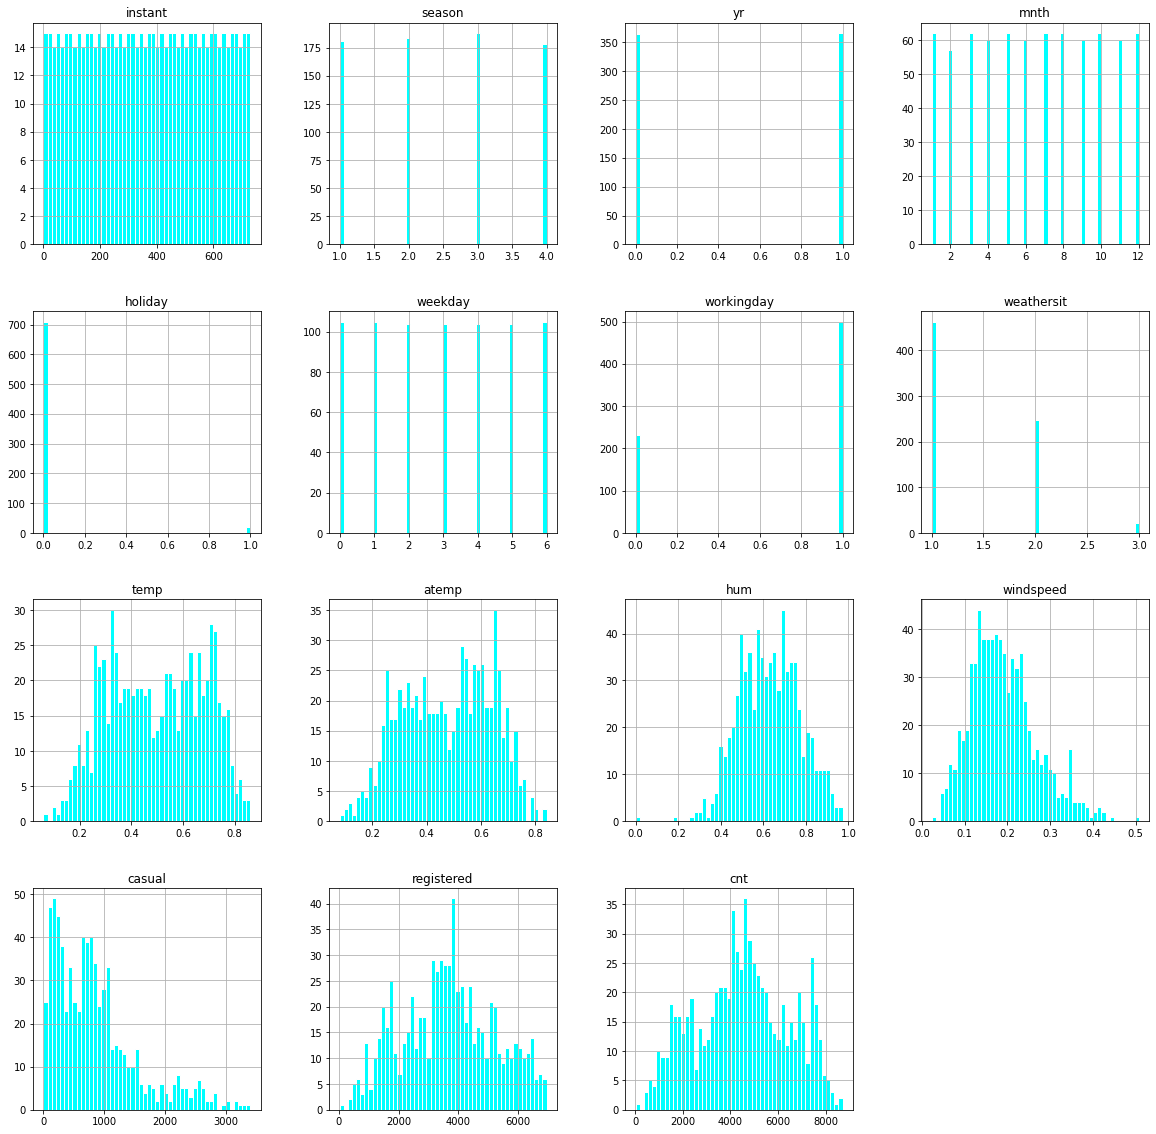

In [153]:
d_f.hist(bins=50, figsize=(20,20), ec='w',color="cyan")
plt.show

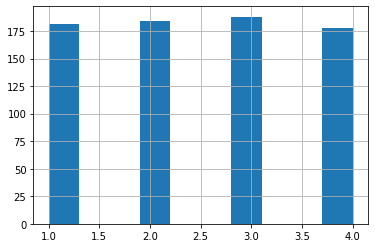

In [154]:
d_f['season'].hist()

In [155]:
print("Min value: ",d_f['temp'].min())
print("Max value: ",d_f['temp'].max())

Min value:  0.0591304
Max value:  0.861667


In [156]:
d_f.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


In [157]:
corr = d_f.corr()
corr.style.background_gradient(cmap='coolwarm')

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


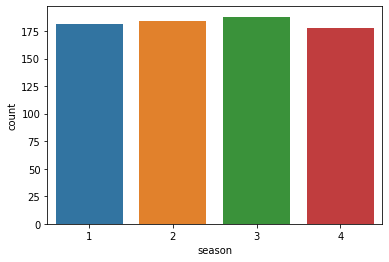

In [158]:
sns.countplot(d_f['season'])

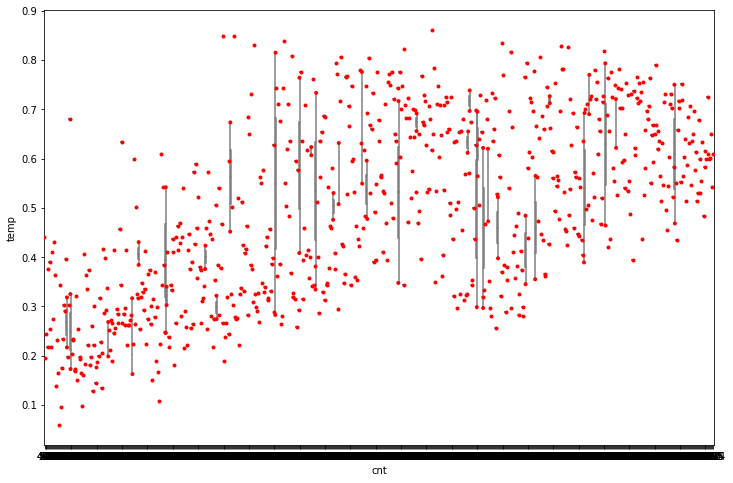

In [159]:

ax = plt.figure(figsize=(12,8))
ax = sns.boxplot(x='cnt', y='temp', data=d_f, color='lightgrey', )
ax = sns.stripplot(x='cnt', y='temp', data=d_f, color='red', jitter=0.4, size=4)

<p>From the distribution we can see the ranges of values, and the distribution of the values.We can use supervised ml learning for this dataset.The features will be temp,atemp,season,month,weekday,hum,windspeed etc and the response is cnt. Multiple Linear Regression and SVR model will be suitable for this dataset because it is based on the different features and their effects. The temp,atemp,weekday,month,seasons are important features.

# Task-3

**Splitting the dataset**

In [160]:
X = d_f.drop(['instant', 'dteday','casual', 'registered', 'cnt'], axis ='columns')
X.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900


In [161]:
y = d_f.cnt
y.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

**Testing with different kinds of models**

In [162]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#Linear Regressing

In [163]:
from sklearn.linear_model import LinearRegression
model = LinearRegression( )
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7936805789817376

#Ridge Regression

In [164]:
from sklearn.linear_model import Ridge
model = Ridge( )
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7970103134254402

#Lasso Regression

In [165]:
from sklearn import linear_model
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7971876072586563

#Support Vector Regression

In [166]:
from sklearn.svm import SVR
model = SVR(kernel='rbf', C=1e3, gamma=0.1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8114597886396044

In [167]:
from sklearn.svm import SVR
model = SVR(kernel='linear', C=1e3)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7996282974598353

In [170]:
from sklearn.svm import SVR
model = SVR(kernel='poly', C=1e3, degree=2)
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.662812644129539

In [172]:
y_pred = model.predict(X_test)
y_pred

array([6174.06586337, 5185.81983519, 3973.01416954, 5428.43605733,
       2582.4443286 , 5859.6650148 , 5419.97582194, 2504.58580775,
       4161.00679774, 4239.62551942, 4475.49815784, 4054.85896055,
       7211.13925054, 3997.39511679, 6240.78486766, 3180.84309581,
       4908.66428497, 4862.26251388, 2837.05928158, 4466.32266553,
       4595.99950684, 3823.81590842, 3964.51321141, 4810.1595779 ,
       4288.16375676, 3167.04499745, 1474.44063625, 3268.11835916,
       3079.05816082, 4021.3067968 , 4945.84642259, 2467.1929066 ,
       6622.90152228, 3834.88823092, 4493.48098836, 3243.42170769,
       4390.66393265, 4737.07216371, 4858.18930095, 4857.78839316,
       6000.62831188, 3549.49591693, 5262.91027748, 4850.43525975,
       3550.41245575, 4222.17206357, 2670.46264042, 4877.07389598,
       2993.39194338, 5351.67861659, 2573.47278048, 6553.54769146,
       4590.28433829, 1556.94939528, 3493.31855368, 4350.92162115,
       3214.15851869, 3927.36777665, 5343.5235194 , 3205.31366

In [173]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 918.8732851566036


In [174]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 1376655.2853610236


In [175]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.662812644129539


<p>From the above interpretation, we can see that different models work differently and every model shows efficient output. But SVR shows more efficiency in score.